# ===============================================================

# Calculating $\eta$ for different planets

# ===============================================================

In [2]:
# Let's import the main libraries
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Let's read the CSV file
csv_data = open('etas.csv')

In [4]:
imagette = np.loadtxt(csv_data, delimiter = ' ')

In [5]:
imagette

array([[5.12425154e-05, 1.68465960e-04, 2.37235956e-04, 1.02844778e-04,
        4.81168627e-05, 2.22387211e-05],
       [1.75474645e-04, 7.73693179e-04, 4.10680200e-03, 3.08525392e-03,
        9.64642417e-05, 3.81556984e-05],
       [2.45916174e-03, 1.52861045e-02, 1.66805526e-01, 4.06344573e-01,
        8.33414767e-04, 6.17109071e-05],
       [1.75771644e-03, 1.29182241e-02, 1.65846455e-01, 1.37426760e-01,
        3.32029364e-03, 1.01196192e-04],
       [5.27729806e-04, 3.82951937e-03, 3.49801844e-02, 3.39604057e-02,
        1.25631057e-04, 4.30230457e-05],
       [1.39459357e-04, 6.73149200e-04, 1.59838436e-03, 8.37353005e-04,
        6.91635494e-05, 2.02126833e-05]])

In [6]:
# Multiplying this 2-D array by by the reference flux of one camera for a star of magnitude P = 11(7046.930689671467 e-/s) then for the 24 cameras (24) and then for the integration time (21s):
def flux_pixel_target(a):
    return a*3551653.0675944197

In [7]:
f_pix_t = flux_pixel_target(imagette)

In [8]:
f_pix_t

array([[1.81995637e+02, 5.98332643e+02, 8.42579811e+02, 3.65268971e+02,
        1.70894403e+02, 7.89842219e+01],
       [6.23225060e+02, 2.74788975e+03, 1.45859359e+04, 1.09577515e+04,
        3.42607520e+02, 1.35515803e+02],
       [8.73408935e+03, 5.42909399e+04, 5.92435358e+05, 1.44319495e+06,
        2.96000011e+03, 2.19175732e+02],
       [6.24279898e+03, 4.58810503e+04, 5.89029072e+05, 4.88092174e+05,
        1.17925311e+04, 3.59413767e+02],
       [1.87431318e+03, 1.36011242e+04, 1.24237479e+05, 1.20615579e+05,
        4.46197929e+02, 1.52802932e+02],
       [4.95311252e+02, 2.39079242e+03, 5.67690673e+03, 2.97398737e+03,
        2.45644932e+02, 7.17884387e+01]])

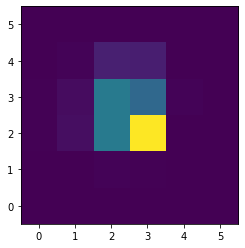

In [9]:
plt.imshow(f_pix_t, origin='lower')

## Let's compute the $NSR_{n}$

In [10]:
#Let's compute the NSRn of the target
def nsr(sb,sq,sd,f):
    
    for i in range(len(f)):
        for j in range(len(f[i])):
            N[i][j] = np.sqrt(sb**2 + sq**2 + sd**2 + f[i][j])/f[i][j]
            
            
    return N

In [11]:
NSRn = nsr(45,7.2,50.2,f_pix_t)

NameError: name 'N' is not defined

In [ ]:
NSRn

## With the help of Jingwei (and Réza):

In [12]:
N = np.sqrt((45)**2 + (7.2)**2 + (50.2)**2 + f_pix_t)/f_pix_t

In [28]:
N

array([[3.79841041e-01, 1.20464468e-01, 8.75319971e-02, 1.92851099e-01,
        4.04045253e-01, 8.65746216e-01],
       [1.15929700e-01, 3.11881625e-02, 9.49558834e-03, 1.13817336e-02,
        2.05137026e-01, 5.07633864e-01],
       [1.32194454e-02, 4.46977208e-03, 1.30424122e-03, 8.33735052e-04,
        2.93683494e-02, 3.16630893e-01],
       [1.66774197e-02, 4.89685696e-03, 1.30803604e-03, 1.43808519e-03,
        1.08561202e-02, 1.95877166e-01],
       [4.29190423e-02, 9.91829619e-03, 2.88910429e-03, 2.93373152e-03,
        1.59155001e-01, 4.51025007e-01],
       [1.44070200e-01, 3.49642646e-02, 1.78547393e-02, 2.92572632e-02,
        2.83287964e-01, 9.51791907e-01]])

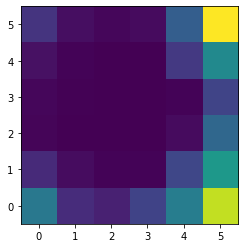

In [29]:
plt.imshow(N, origin='lower')

In [30]:
type(N)

numpy.ndarray

## Let's sort this matrix with the amazing algorithm I studied

In [31]:
# Function to sort the matrix
def sortMat(data, row, col):
     
    # Number of elements in matrix
    size = row * col
     
    # Loop to sort the matrix
    # using Bubble Sort
    for i in range(0, size):
        for j in range(0, size-1):
             
            # Condition to check
            # if the Adjacent elements
            if ( data[j//col][j % col] >\
                data[(j + 1)//col][(j + 1)% col] ):
                 
                # Swap if previous value is greater
                temp = data[j//col][j % col]
                data[j//col][j % col] =\
                    data[(j + 1)//col][(j + 1)% col]
                data[(j + 1)//col][(j + 1)% col] =\
                                 temp

In [32]:
n = [] 
def printMat(mat, row, col):
    
    # Loop to print the matrix
    for i in range(row):
        for j in range(col):
            n.append(mat[i][j])

In [33]:
# Driver Code
if __name__ == "__main__":
    mat = [[3.79841041e-01, 1.20464468e-01, 8.75319971e-02, 1.92851099e-01,
        4.04045253e-01, 8.65746216e-01],
       [1.15929700e-01, 3.11881625e-02, 9.49558834e-03, 1.13817336e-02,
        2.05137026e-01, 5.07633864e-01],
       [1.32194454e-02, 4.46977208e-03, 1.30424122e-03, 8.33735052e-04,
        2.93683494e-02, 3.16630893e-01],
       [1.66774197e-02, 4.89685696e-03, 1.30803604e-03, 1.43808519e-03,
        1.08561202e-02, 1.95877166e-01],
       [4.29190423e-02, 9.91829619e-03, 2.88910429e-03, 2.93373152e-03,
        1.59155001e-01, 4.51025007e-01],
       [1.44070200e-01, 3.49642646e-02, 1.78547393e-02, 2.92572632e-02,
        2.83287964e-01, 9.51791907e-01]]
    row = len(mat)
    col = len(mat[0])
     
    # Function call to sort
    sortMat(mat, row, col)
     
    # Function call to
    # print matrix
    printMat(mat, row, col)

In [34]:
n = np.array(n)

In [35]:
n

array([8.33735052e-04, 1.30424122e-03, 1.30803604e-03, 1.43808519e-03,
       2.88910429e-03, 2.93373152e-03, 4.46977208e-03, 4.89685696e-03,
       9.49558834e-03, 9.91829619e-03, 1.08561202e-02, 1.13817336e-02,
       1.32194454e-02, 1.66774197e-02, 1.78547393e-02, 2.92572632e-02,
       2.93683494e-02, 3.11881625e-02, 3.49642646e-02, 4.29190423e-02,
       8.75319971e-02, 1.15929700e-01, 1.20464468e-01, 1.44070200e-01,
       1.59155001e-01, 1.92851099e-01, 1.95877166e-01, 2.05137026e-01,
       2.83287964e-01, 3.16630893e-01, 3.79841041e-01, 4.04045253e-01,
       4.51025007e-01, 5.07633864e-01, 8.65746216e-01, 9.51791907e-01])

In [36]:
n = np.reshape(n, (-1,6))

In [37]:
n

array([[8.33735052e-04, 1.30424122e-03, 1.30803604e-03, 1.43808519e-03,
        2.88910429e-03, 2.93373152e-03],
       [4.46977208e-03, 4.89685696e-03, 9.49558834e-03, 9.91829619e-03,
        1.08561202e-02, 1.13817336e-02],
       [1.32194454e-02, 1.66774197e-02, 1.78547393e-02, 2.92572632e-02,
        2.93683494e-02, 3.11881625e-02],
       [3.49642646e-02, 4.29190423e-02, 8.75319971e-02, 1.15929700e-01,
        1.20464468e-01, 1.44070200e-01],
       [1.59155001e-01, 1.92851099e-01, 1.95877166e-01, 2.05137026e-01,
        2.83287964e-01, 3.16630893e-01],
       [3.79841041e-01, 4.04045253e-01, 4.51025007e-01, 5.07633864e-01,
        8.65746216e-01, 9.51791907e-01]])

In [38]:
NSR_n_sorted = n

In [39]:
NSR_n_sorted

array([[8.33735052e-04, 1.30424122e-03, 1.30803604e-03, 1.43808519e-03,
        2.88910429e-03, 2.93373152e-03],
       [4.46977208e-03, 4.89685696e-03, 9.49558834e-03, 9.91829619e-03,
        1.08561202e-02, 1.13817336e-02],
       [1.32194454e-02, 1.66774197e-02, 1.78547393e-02, 2.92572632e-02,
        2.93683494e-02, 3.11881625e-02],
       [3.49642646e-02, 4.29190423e-02, 8.75319971e-02, 1.15929700e-01,
        1.20464468e-01, 1.44070200e-01],
       [1.59155001e-01, 1.92851099e-01, 1.95877166e-01, 2.05137026e-01,
        2.83287964e-01, 3.16630893e-01],
       [3.79841041e-01, 4.04045253e-01, 4.51025007e-01, 5.07633864e-01,
        8.65746216e-01, 9.51791907e-01]])

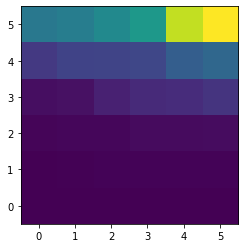

In [40]:
plt.imshow(NSR_n_sorted, origin='lower')

In [41]:
# Driver Code
if __name__ == "__main__":
    mat = [[7.03457901e-01, 9.23325718e-01, 2.71577077e+00, 4.37231794e+00,
        1.08373748e+01, 2.44076370e+01],
       [7.28910269e-03, 1.20112480e-01, 1.77438290e-01, 5.19696418e-01,
        7.02216962e+00, 1.55767965e+01],
       [3.99800801e-03, 1.25725706e-02, 1.29305871e-02, 6.68636519e-02,
        2.56527614e+00, 1.02107757e+01],
       [7.79967608e-03, 2.90484070e-02, 8.17818390e-02, 1.99574561e-01,
        4.58401289e+00, 1.13149107e+01],
       [6.00909455e-02, 1.36472072e-01, 6.86916852e-01, 8.59293792e-01,
        1.00261062e+01, 2.47481004e+01],
       [1.52908459e+00, 1.57357502e+00, 4.02176133e+00, 5.23582762e+00,
        2.38829280e+01, 5.83775556e+01]]
    row = len(mat)
    col = len(mat[0])
     
    # Function call to sort
    sortMat(mat, row, col)
     
    # Function call to
    # print matrix
    printMat(mat, row, col)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

## Making f_pix_t a 1-D array 

In [40]:
f_pix_1 = f_pix_t.ravel()

In [41]:
f_pix_1_sorted = np.sort(f_pix_1)[::-1]

In [42]:
f_pix_1_sorted

array([1.44319495e+06, 5.92435358e+05, 5.89029072e+05, 4.88092174e+05,
       1.24237479e+05, 1.20615579e+05, 5.42909399e+04, 4.58810503e+04,
       1.45859359e+04, 1.36011242e+04, 1.17925311e+04, 1.09577515e+04,
       8.73408935e+03, 6.24279898e+03, 5.67690673e+03, 2.97398737e+03,
       2.96000011e+03, 2.74788975e+03, 2.39079242e+03, 1.87431318e+03,
       8.42579811e+02, 6.23225060e+02, 5.98332643e+02, 4.95311252e+02,
       4.46197929e+02, 3.65268971e+02, 3.59413767e+02, 3.42607520e+02,
       2.45644932e+02, 2.19175732e+02, 1.81995637e+02, 1.70894403e+02,
       1.52802932e+02, 1.35515803e+02, 7.89842219e+01, 7.17884387e+01])

## Calculating now $NSR_{agg}(m)$

In [43]:
#Let's calculate the numerator of NSR_agg
def numerator_agg(sb,sq,sd,f):
    c = []
    d = 0
    for i in range(0,len(f_pix_1_sorted)):
        d = d + sb**2 + sq*2 + sd**2 + f[i]
        c.append(d)
    return c

In [44]:
n_nsragg = np.array(np.sqrt(numerator_agg(45,7.2,50.2,f_pix_1_sorted)))

In [45]:
#Let's calculate the denominator of NSR_agg of the target
def denominator_agg(F):
    a = [F[0]]
    b = F[0]
    for i in range(1,len(F)):
        b = b + F[i]
        a.append(b)
    return a

In [46]:
d_nsragg = np.array(denominator_agg(f_pix_1_sorted))

In [47]:
def nsr_agg(n,d):
    return n/d

In [48]:
NSR_agg = nsr_agg(n_nsragg,d_nsragg)

## Now, we have to obtain $NSR_{1h}$, which is:

# $NSR_{1h} = \frac{10^{6}}{12 \sqrt{N_{T}}} NSR_{agg}(m)$

In [50]:
def nsr1h(z,nsr):
    return z*nsr

In [51]:
NSR1h = nsr1h(10**6/(12*np.sqrt(24)),NSR_agg)

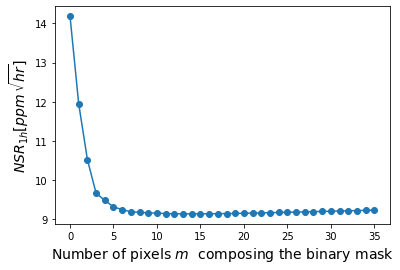

In [52]:
plt.plot(NSR1h, 'o-')
plt.xlabel('Number of pixels $m$  composing the binary mask', fontsize=14)
plt.ylabel('$ NSR_{1h}[ppm \, \sqrt{hr}] $', fontsize = 14)
#plt.savefig('binary_mask.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

In [53]:
def etat(td,ntr_t,dbeb):
    term1 = SPRT*np.sqrt(td*ntr_t)
    term2 = dbeb/min(NSR1h)
    return term1*term2